# Simulation of Ho-Lee model and Computation of Zero-Coupon Bond (ZCB P(0,T))
We specify a certain form of a volatility sigma(t, T) for the instantaneous forward rate f(t, T) and determine the resulting short-rate dynamics.

In Ho-Lee model, sigma(t, T) is a constant

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Instantaneous forward rate
def f0T(t, P0T):
    dt = 0.01
    expr = - (np.log(P0T(t + dt)) - np.log(P0T(t - dt))) / (2*dt)
    
    return expr

In [10]:
def GeneratePathsHoLeeEuler(NoOfPaths, NoOfSteps, T, P0T, sigma):
    # Initial interest rate is a forward rate at time t -> 0
    r0 = f0T(0.01, P0T)
    
    # theta in Ho-Lee short rate model
    theta = lambda t: (f0T(t+dt,P0T) - f0T(t-dt,P0T))/(2*dt) + sigma**2*t
    
    Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    R = np.zeros([NoOfPaths, NoOfSteps + 1])
    M = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    # Money saving account
    M[:, 0] = 1
    # short rate
    R[:, 0] = r0
    
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):
        # Making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
        
        W[:, i+1] = W[:, i] + np.power(dt, 0.5) * Z[:, i]
        
        R[:, i+1] = R[:, i] + theta(time[i])*dt + sigma*(W[:, i+1] - W[:, i])
        
        # Discount factor
        M[:, i+1] = M[:, i]*np.exp((R[:, i+1] + R[:, i])*0.5*dt)
        
        time[i+1] = time[i] + dt
        
    # Outputs
    paths = {"time": time, "R": R, "M": M}
    
    return paths
        

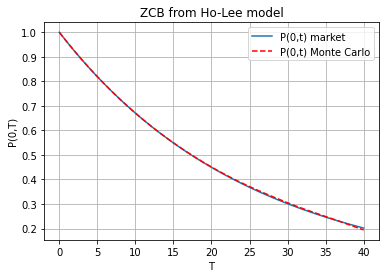

In [15]:
def mainCalculation():
    NoOfPaths = 25000
    NoOfSteps = 500
    
    sigma = 0.02
    
    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-0.04*T)
    # P0T = lambda T: np.exp(-0.04*T^2 - 0.01)
    
    # In this experiment we compare ZCB from the market and Monte Carlo
    # "Monte Carlo part"
    T = 40
    paths = GeneratePathsHoLeeEuler(NoOfPaths, NoOfSteps, T, P0T, sigma)
    M  = paths["M"]
    ti = paths["time"]
    
    # Here we compare the price of an option on a ZCB from MC and Analytical expression
    P_t = np.zeros([NoOfSteps + 1])
    
    for i in range(0, NoOfSteps + 1):
        P_t[i] = np.mean(1 / M[:, i])
        
    plt.figure(1)
    plt.grid()
    plt.xlabel("T")
    plt.ylabel("P(0,T)")
    plt.plot(ti, P0T(ti))
    plt.plot(ti, P_t, '--r')
    plt.legend(["P(0,t) market", "P(0,t) Monte Carlo"])
    plt.title("ZCB from Ho-Lee model")
        
mainCalculation()

Whatever our choose to change interest rate or sigma, there is always perfect match between yiled as input and yield as output. It is crucial to those model.